In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset=randn(25)

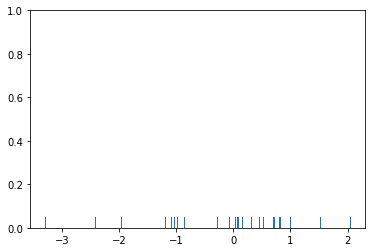

In [3]:
sns.rugplot(dataset)

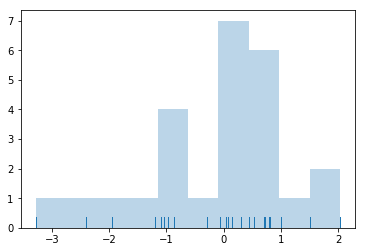

In [6]:
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)

(0, 1)

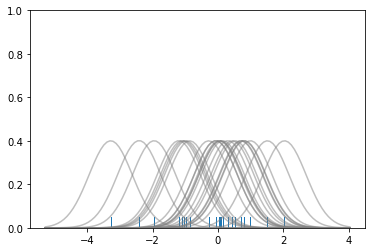

In [9]:
sns.rugplot(dataset)

x_min=dataset.min()-2
x_max=dataset.max()+2
x_axis=np.linspace(x_min,x_max,100)

bandwidth=((4*dataset.std()**5)/(3*len(dataset)))**0.2

kernel_list=[]
for data_point in dataset:
    kernel=stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    kernel=kernel/kernel.max()
    kernel=kernel*0.4
    plt.plot(x_axis,kernel,color='gray',alpha=0.5)
plt.ylim(0,1)

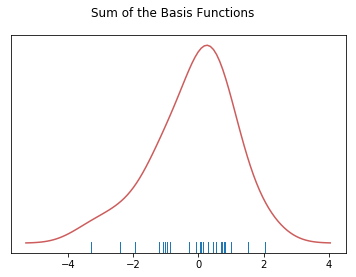

In [12]:
sum_of_kde=np.sum(kernel_list,axis=0)

fig=plt.plot(x_axis,sum_of_kde,color='indianred')
sns.rugplot(dataset)
plt.yticks([])
plt.suptitle('Sum of the Basis Functions')

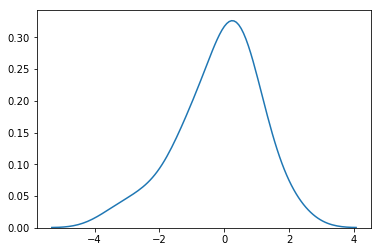

In [13]:
sns.kdeplot(dataset)

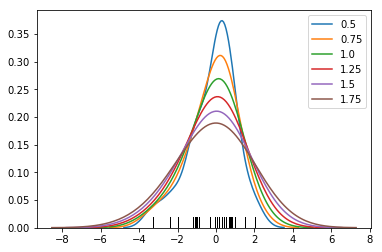

In [16]:
sns.rugplot(dataset,color='black')
for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,label=bw)

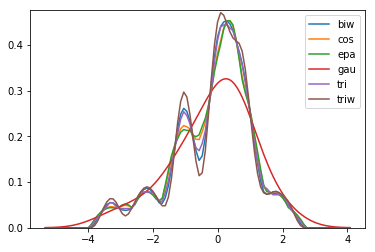

In [17]:
kernel_options=['biw','cos','epa','gau','tri','triw']
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern)

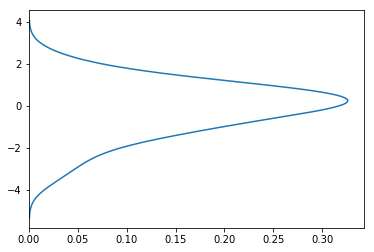

In [18]:
sns.kdeplot(dataset,vertical=True)

(array([  1.,   2.,   3.,   4.,   8.,   9.,  16.,  22.,  23.,  25.]),
 array([-3.28658657, -2.7541303 , -2.22167404, -1.68921777, -1.15676151,
        -0.62430524, -0.09184898,  0.44060729,  0.97306355,  1.50551982,
         2.03797608]),
 <a list of 10 Patch objects>)

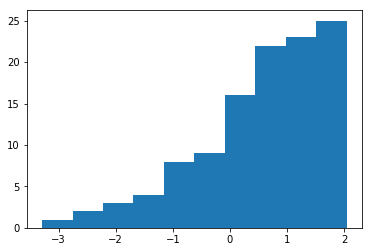

In [20]:
plt.hist(dataset,cumulative=True)

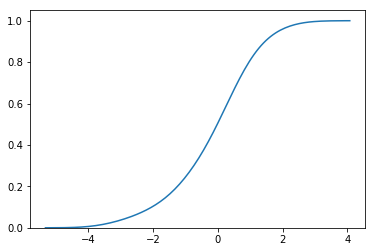

In [21]:
sns.kdeplot(dataset,cumulative=True)

In [22]:
mean=[0,0]
cov=[[1,0],[0,100]]
dataset2=np.random.multivariate_normal(mean,cov,1000)

In [35]:
dframe=pd.DataFrame(dataset2,columns=['X','Y'])

seaborn(0.8)

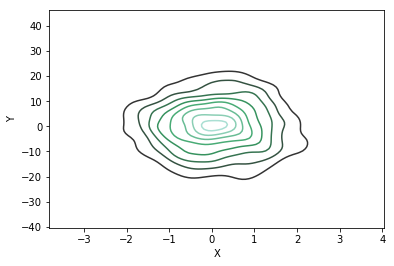

In [27]:
sns.kdeplot(dframe.X,dframe.Y)

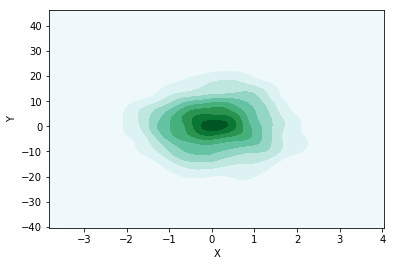

In [28]:
sns.kdeplot(dframe.X,dframe.Y,shade=True)

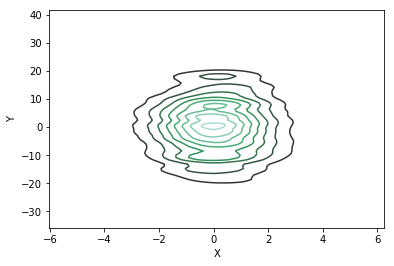

In [33]:
sns.kdeplot(dframe.X,dframe.Y,bw=1)

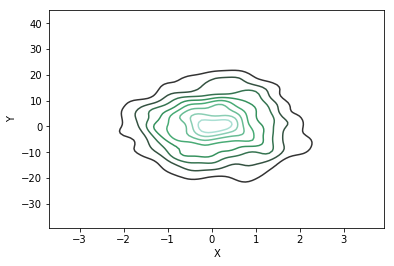

In [34]:
sns.kdeplot(dframe.X,dframe.Y,bw='silverman')

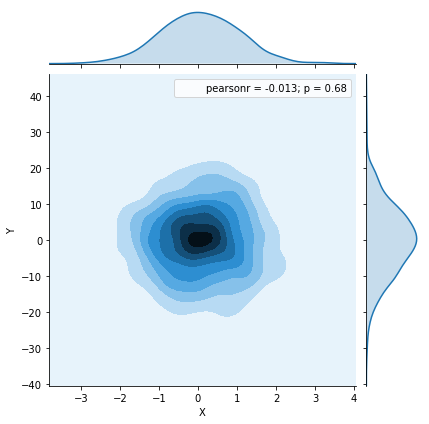

In [32]:
sns.jointplot('X','Y',dframe,kind='kde')